<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#Loading Dataset
data = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv")

In [3]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

In [4]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [5]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [6]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
len(X_train)

86760

In [9]:
len(X_test)

21691

In [10]:
X_train.shape


(86760, 215)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(215,), activation='relu'), # input layer
    keras.layers.Dense(350, activation='sigmoid'),
    keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])

'''model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(215,), activation='relu'), # input layer
    #keras.layers.Dense(350, activation='sigmoid'),
    #keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(75, activation='sigmoid'),
    keras.layers.Dense(25, activation='softmax')                    # output layer
])'''




model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=250)

Epoch 1/250
2712/2712 [==============================] - 22s 8ms/step - loss: 0.9193 - accuracy: 0.6387
Epoch 2/250
2712/2712 [==============================] - 20s 7ms/step - loss: 0.7646 - accuracy: 0.6966
Epoch 3/250
2712/2712 [==============================] - 21s 8ms/step - loss: 0.7104 - accuracy: 0.7198
Epoch 4/250
2712/2712 [==============================] - 28s 10ms/step - loss: 0.6721 - accuracy: 0.7341
Epoch 5/250
2712/2712 [==============================] - 23s 8ms/step - loss: 0.6414 - accuracy: 0.7453
Epoch 6/250
2712/2712 [==============================] - 20s 7ms/step - loss: 0.6148 - accuracy: 0.7564
Epoch 7/250
2712/2712 [==============================] - 20s 7ms/step - loss: 0.5916 - accuracy: 0.7657
Epoch 8/250
2712/2712 [==============================] - 20s 7ms/step - loss: 0.5684 - accuracy: 0.7736
Epoch 9/250
2712/2712 [==============================] - 20s 7ms/step - loss: 0.5476 - accuracy: 0.7820
Epoch 10/250
2712/2712 [==============================] - 20s 7

In [ ]:
model.evaluate(X_test, y_test)

#Confusion Matrix

In [20]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

[[ 886  635   29  328  490]
 [ 425 6108  854  352  152]
 [  16  734 3460   21   23]
 [ 259  491   29 2515   80]
 [ 385  204   23   80 3112]]
              precision    recall  f1-score   support

           0       0.45      0.37      0.41      2368
           1       0.75      0.77      0.76      7891
           2       0.79      0.81      0.80      4254
           3       0.76      0.75      0.75      3374
           4       0.81      0.82      0.81      3804

    accuracy                           0.74     21691
   macro avg       0.71      0.71      0.71     21691
weighted avg       0.74      0.74      0.74     21691

Accurecy:  0.7413673873956941


**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

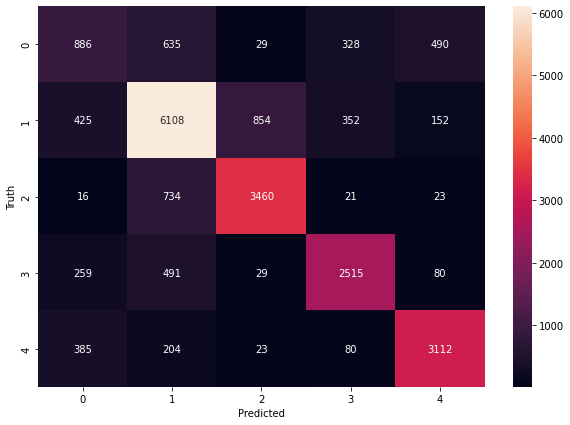

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')

#ROC graph

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);